In [3]:
# !pip install cerebras_cloud_sdk

In [72]:
import ast
import os
import re

from tqdm import tqdm

import pandas as pd
from cerebras.cloud.sdk import Cerebras

client = Cerebras(
        api_key = os.environ.get("CEREBRAS_API_KEY")
)


In [3]:

stream = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "Who are you?"
        }
    ],
    model="llama-4-scout-17b-16e-instruct",
    stream=True,
    max_completion_tokens=2048,
    temperature=0.2,
    top_p=1
)

for chunk in stream:
  print(chunk.choices[0].delta.content or "", end="")

I'm an AI assistant designed by Meta. I'm here to answer your questions, share interesting ideas and maybe even surprise you with a fresh perspective. What's on your mind?

In [4]:
system_prompt = "Solve the following question with highly detailed step by step explanation. Write the correct answer inside a dictionary at the end in the following format. The key 'answer' has a list which can be filled by all correct options or by a number as required while answering the question. For example for question with correct answer as option (a), return {'answer':[a]} at the end of solution. For question with multiple options'a,c' as answers, return {'answer':[a,c]}. And for question with numerical values as answer (say 1.33), return {'answer':[1.33]}"

In [6]:
df = pd.read_excel('/Users/mohdzaki/Documents/github/MaSTeA/all_QA.xlsx')

In [24]:
questions = list(df.QUESTION.apply(lambda x: x[2:-2]))

In [40]:
answers = []
for q in tqdm(questions):
    question = q.strip()
    stream = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": q
        },
    ],
    model="llama-4-scout-17b-16e-instruct",
    stream=False,
    max_completion_tokens=2048,
    temperature=0.,
    top_p=1
    )
    answers.append(stream)
    # break

100%|███████████████████████████████████████████████████████████████████| 650/650 [22:47<00:00,  2.10s/it]


In [77]:
extraction = []
for ans in tqdm(answers):
    try:
        idx = ans.to_dict()['choices'][0]['message']['content'].index("{'answer")
        extraction.append(ans.to_dict()['choices'][0]['message']['content'][idx:])
    except:
        
        extraction.append(ans)
        print(len(extraction))

100%|████████████████████████████████████████████████████████████████| 650/650 [00:00<00:00, 42081.59it/s]

110
557


In [78]:
df['LLAMA-SCOUT_answers_complete'] = answers

In [175]:
eval_prompt = 'You are an evaluation expert. You will be provided with correct answer and the answer to be evaluated. Please return 1 if both are correct, else return 0. DO NOT OUTPUT ANYTHING ELSE.'

In [176]:
from tqdm import tqdm, trange

In [181]:
import time

In [182]:
len(score)

31

'1'

In [185]:
score = []
for i in trange(len(df['LLAMA-SCOUT'])):
    correct_answer = df['Correct Answer'].iloc[i]
    evaluate = df['LLAMA-SCOUT'].iloc[i]
    msg = f'Correct answer : {correct_answer}. Evaluate : {evaluate}'
    
    stream = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": eval_prompt
        },
        {
            "role": "user",
            "content": msg
        },
    ],
    model="llama-4-scout-17b-16e-instruct",
    stream=False,
    max_completion_tokens=5,
    temperature=0.,
    top_p=1
    )
    score.append(stream)
    time.sleep(1)
    # break

100%|███████████████████████████████████████████████████████████████████| 650/650 [23:36<00:00,  2.18s/it]


In [189]:
df['LLAMA-SCOUT-score'] = score

In [196]:
nums = []
for x in score:
    try:
        nums.append(int(x.to_dict()['choices'][0]['message']['content']))
    except:
        nums.append('check me')
        print(x.to_dict()['choices'][0]['message']['content'])

## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
To be evaluated: The
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:
## Step 1:


In [197]:
len(nums)

650

In [198]:
df['nums'] = nums

In [199]:
df.to_excel('cerebras.xlsx',index=False)

In [201]:
df = pd.read_excel('cerebras.xlsx')

In [203]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Question Info,Question Type,Correct Answer,GPT3.5,GPT3.5-COT,GPT4,GPT4-COT,...,Corresponding Value,detailed_chatgpt,detailed_gpt4,detailed_llama3_8b,detailed_phi3_mini,LLAMA-SCOUT_answers_complete,LLAMA-SCOUT,LLAMA-SCOUT-filter,LLAMA-SCOUT-score,nums
0,0,0,0,G-XEC-2012-1,MCQS,D,D,C,D,D,...,Face centred tetragonal,"['\n', '\n', 'A Bravais lattice is a mathemati...",['To determine which of the given choices is n...,['A Bravais lattice is a lattice that is compo...,"["" To determine which of the given options is ...",ChatCompletionResponse(id='chatcmpl-105bdb45-a...,{'answer': ['D']},D,ChatCompletionResponse(id='chatcmpl-89dca21c-5...,1
1,1,1,1,G-XEC-2012-2,MCQS,C,B,C,C,C,...,Cation and anion vacancy,['Schottky defect in ionic crystals refers to ...,['A Schottky defect in an ionic crystal is a t...,['A Schottky defect is a type of defect that o...,[' A Schottky defect in an ionic crystal is a ...,ChatCompletionResponse(id='chatcmpl-576256b6-c...,{'answer':[C]},[C],ChatCompletionResponse(id='chatcmpl-e18299ee-4...,1
2,2,2,2,G-XEC-2012-3,MCQS,A,A,A,A,A,...,Calendering,"['To solve this question, we need to know the ...","[""Let's briefly explain each technique and det...","['To solve this problem, we need to identify w...","["" To determine which technique is NOT used fo...",ChatCompletionResponse(id='chatcmpl-dd8f1ff9-d...,{'answer': ['A']},A,ChatCompletionResponse(id='chatcmpl-5fc8421d-5...,1
3,3,3,3,G-XEC-2012-4,MCQS,B,B,B,B,B,...,Backscattered electron,['The correct option is (B) Backscattered elec...,"[""To solve this question, let's first understa...",['The correct answer is (B) Backscattered elec...,"["" To solve this question, let's break down th...",ChatCompletionResponse(id='chatcmpl-59544a79-c...,{'answer':[B]},[B],ChatCompletionResponse(id='chatcmpl-b33dac35-6...,1
4,4,4,4,G-XEC-2012-5,MCQS,A,A,C,C,C,...,$Nd_2Fe_,['Magnetostriction is the property of a magnet...,['Magnetostriction is the property of a materi...,"[""Magnetostrictive materials are a class of ma...",[' To determine the best magnetostrictive mate...,ChatCompletionResponse(id='chatcmpl-e849b627-e...,{'answer':[C]},[C],ChatCompletionResponse(id='chatcmpl-e44c323e-b...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,645,645,645,G-META-22-58,NUM,197 TO 201,0,200,7874,200,...,NaN,['The mesh number of a sieve indicates the num...,['The mesh number of a sieve is defined as the...,"['To find the mesh number of the sieve, we nee...","[' To find the mesh number of a sieve, we need...",ChatCompletionResponse(id='chatcmpl-185abeb6-8...,{'answer':[343]},343,ChatCompletionResponse(id='chatcmpl-7a9ef97b-b...,0
646,646,646,646,G-META-22-59,NUM,220 TO 220,487,220,214,220,...,NaN,['The heat input per unit length of the weld c...,"['To solve this problem, we need to equate the...","['To solve this problem, we need to use the fo...","[' To solve this problem, we will first determ...",ChatCompletionResponse(id='chatcmpl-ea54ae7c-c...,{'answer':[220]},220,ChatCompletionResponse(id='chatcmpl-5d16420e-f...,1
647,647,647,647,G-META-22-60,NUM,200 TO 210,42,437,0,477,...,NaN,"['Given:\n', 'Diameter of cylindrical specimen...","['To solve this problem, we need to find the i...","['To solve this problem, we need to find the i...",[' To calculate the ideal plastic work of defo...,ChatCompletionResponse(id='chatcmpl-87ba1c8e-e...,{'answer':[185]},185,ChatCompletionResponse(id='chatcmpl-73e9ee33-f...,0
648,648,648,648,G-META-22-62,NUM,16.55 TO 18.55,8.16,1.34,1.53,12.32,...,NaN,"['Given data:\n', '\n', 'The coefficient of co...","['Given data:\n', '\n', 'Coefficient of convec...","['To solve this problem, we can use the follow...","[' To find the length of the tube, we first ne...",ChatCompletionResponse(id='chatcmpl-dd62d516-6...,{'answer':[17.86]},17.86,ChatCompletionResponse(id='chatcmpl-37661f9c-1...,1


In [206]:
def extract_corresponding_value(question, correct_answer):
    # Find the option corresponding to the correct answer letter
    match = re.search(r'\({}\)\s*(.*?)(?:\s*\(|$)'.format(correct_answer), question)
    if match:
        extracted_value = match.group(1).strip()
        if correct_answer == 'D':
            extracted_value = extracted_value[:-2]  # Exclude the last two characters
        return extracted_value
    return None


# Function to check if a prediction is correct for a given row
def is_correct_prediction(row):
    # ground_truth = str(row['Correct Answer'])
    # # Change the below line with the model name that you are interested in evaluating
    # predicted = row['LLAMA-SCOUT-filter'] #row['LLAMA3-8B']
    # question_type = row['Question Type']
    
    # # Select NUM category
    # if question_type == 'NUM':
    #     if 'to' in ground_truth or ':' in ground_truth:
    #         try:
    #             range_numbers = re.findall(r'\d+\.\d+|\d+', ground_truth)
    #             range_start, range_end = map(float, [range_numbers[0], range_numbers[-1]])
    #             if range_start <= float(predicted) <= range_end:
    #                 return True
    #         except (ValueError, IndexError):
    #             pass
    #     elif str(predicted) == ground_truth:
    #         return True

    # # For MATCH category
    # else:
    #     # First, check if the predicted answer matches the ground truth
    #     if str(predicted) == ground_truth:
    #         return True
    #     # If not, check if the ground truth matches the corresponding answer
    #     corresponding_answer = row['Corresponding Value']
    #     if corresponding_answer and predicted == corresponding_answer:
    #         return True

    # # For other question types, check for exact match
    return row['nums']


def calculate_accuracy(df):
    results_by_category = df.apply(is_correct_prediction, axis=1).groupby([df['Question Type'], df['TOPIC']]).agg(['sum', 'count'])

    accuracies = {}
    total_correct_predictions = 0
    total_questions = 0

    print("\nResults by category (Correct Predictions / Total Questions):")
    for category, result in results_by_category.iterrows():
        correct_predictions = result['sum']
        total = result['count']
        accuracy = correct_predictions / total
        accuracies[category] = accuracy
        total_correct_predictions += correct_predictions
        total_questions += total
        print(f"{category}: {correct_predictions} / {total} (Accuracy: {accuracy:.2%})")

    # Calculate accuracy for specific question types (NUM, MATCH, etc.)
    for question_type in df['Question Type'].unique():
        if question_type not in accuracies:
            accuracies[question_type] = 0
        questions_subset = df[df['Question Type'] == question_type]
        correct_predictions_subset = questions_subset.apply(is_correct_prediction, axis=1).sum()
        total_questions_subset = len(questions_subset)
        accuracy_subset = correct_predictions_subset / total_questions_subset
        print(f"{question_type} Accuracy: {correct_predictions_subset} / {total_questions_subset} (Accuracy: {accuracy_subset:.2%})")

    overall_accuracy = total_correct_predictions / total_questions
    print(f"\nOverall Accuracy: {total_correct_predictions} / {total_questions} (Accuracy: {overall_accuracy:.2%})")

    return accuracies, overall_accuracy

category_accuracies, overall_accuracy = calculate_accuracy(df)


Results by category (Correct Predictions / Total Questions):
('MATCH', 'Atomic structure'): 5 / 6 (Accuracy: 83.33%)
('MATCH', 'Fluid'): 1 / 1 (Accuracy: 100.00%)
('MATCH', 'Magnetism'): 2 / 2 (Accuracy: 100.00%)
('MATCH', 'Material Applications'): 16 / 16 (Accuracy: 100.00%)
('MATCH', 'Material characterization'): 5 / 5 (Accuracy: 100.00%)
('MATCH', 'Material manufacturing'): 17 / 17 (Accuracy: 100.00%)
('MATCH', 'Material processing'): 6 / 6 (Accuracy: 100.00%)
('MATCH', 'Material testing'): 1 / 1 (Accuracy: 100.00%)
('MATCH', 'Mechanical'): 4 / 5 (Accuracy: 80.00%)
('MATCH', 'Miscellaneous'): 2 / 2 (Accuracy: 100.00%)
('MATCH', 'Phase transition'): 7 / 7 (Accuracy: 100.00%)
('MATCH', 'Transport phenomena'): 2 / 2 (Accuracy: 100.00%)
('MCQS', 'Atomic structure'): 44 / 47 (Accuracy: 93.62%)
('MCQS', 'Electrical'): 9 / 11 (Accuracy: 81.82%)
('MCQS', 'Fluid'): 6 / 6 (Accuracy: 100.00%)
('MCQS', 'Magnetism'): 6 / 6 (Accuracy: 100.00%)
('MCQS', 'Material Applications'): 27 / 27 (Accuracy

In [217]:
import matplotlib.pyplot as plt

In [221]:
from new_plot import *
set_things()

<h2>Performance on different question types</h2>

In [214]:
qtypes = []
scores = []
for qtype in df['Question Type'].unique():
    qtypes.append(qtype)
    mask = df['Question Type'] == qtype
    scores.append(100*df[mask]['nums'].sum().item()/sum(mask))

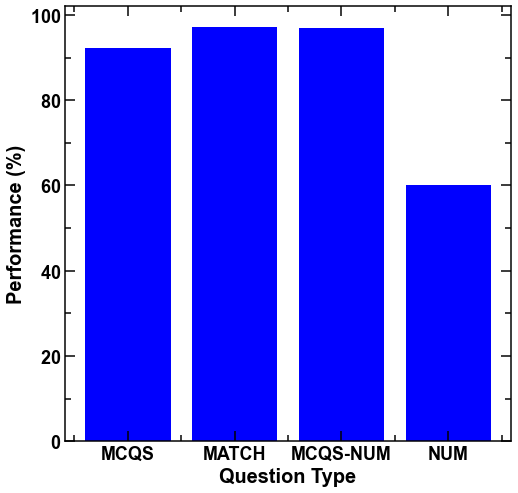

In [226]:
fig, ax = plt.subplots(figsize=[8,8])
plt.bar(qtypes, scores)
plt.xlabel('Question Type')
plt.ylabel('Performance (%)')
plt.show()

In [239]:
qtypes = []
scores = []
for qtype in df['TOPIC'].value_counts(ascending=True).index:
    qtypes.append(qtype)
    mask = df['TOPIC'] == qtype
    scores.append(100*df[mask]['nums'].sum().item()/sum(mask))

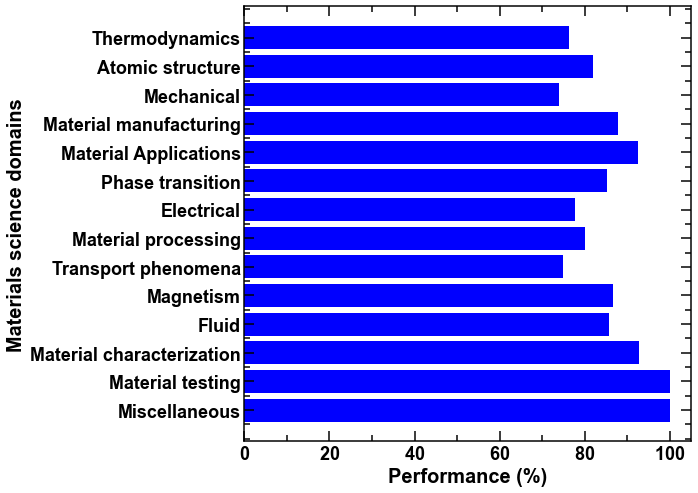

In [240]:
fig, ax = plt.subplots(figsize=[8,8])
plt.barh(qtypes, scores)
plt.ylabel('Materials science domains')
plt.xlabel('Performance (%)')
plt.show()

<h2>Comparison with other models</h2>

<table>
  <caption><strong>Accuracy of Language Models by Topic</strong></caption>
  <thead>
    <tr>
      <th>Topic</th>
      <th># Questions</th>
      <th>LLaMA-3-8b</th>
      <th>Haiku</th>
      <th>Sonnet</th>
      <th>OPUS</th>
      <th>GPT4</th>
      <th>LLAMA-4-SCOUT</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Thermodynamics</td><td>114</td><td>37.72</td><td>47.37</td><td>55.26</td><td>73.68</td><td>57.02</td><td><strong>76.31</strong></td></tr>
    <tr><td>Atomic structure</td><td>100</td><td>32.00</td><td>40.00</td><td>49.00</td><td>64.00</td><td>59.00</td><td><strong>82.00</strong></td></tr>
    <tr><td>Mechanical behavior</td><td>96</td><td>22.92</td><td>41.67</td><td>52.08</td><td>71.88</td><td>43.75</td><td><strong>73.95</strong></td></tr>
    <tr><td>Material manufacturing</td><td>91</td><td>43.96</td><td>57.14</td><td>56.04</td><td>80.22</td><td>68.13</td><td><strong>87.91</strong></td></tr>
    <tr><td>Material applications</td><td>53</td><td>52.83</td><td>64.15</td><td>77.36</td><td><strong>92.45</strong></td><td>86.79</td><td><strong>92.45</strong></td></tr>
    <tr><td>Phase transition</td><td>41</td><td>31.71</td><td>46.34</td><td>65.85</td><td>70.73</td><td>63.41</td><td><strong>85.36</strong></td></tr>
    <tr><td>Electrical properties</td><td>36</td><td>33.33</td><td>25.00</td><td>55.56</td><td>72.22</td><td>44.44</td><td><strong>77.77</strong></td></tr>
    <tr><td>Material processing</td><td>35</td><td>48.57</td><td>54.29</td><td>74.29</td><td><strong>88.57</strong></td><td><strong>88.57</strong></td><td>80.00</td></tr>
    <tr><td>Transport phenomena</td><td>24</td><td>37.50</td><td>70.83</td><td>58.33</td><td><strong>87.50</strong></td><td>62.50</td><td>75.00</td></tr>
    <tr><td>Magnetic properties</td><td>15</td><td>26.67</td><td>46.67</td><td>46.67</td><td>66.67</td><td>60.00</td><td><strong>86.67</strong></td></tr>
    <tr><td>Material characterization</td><td>14</td><td>78.57</td><td>57.14</td><td>85.71</td><td><strong>92.86</strong></td><td>71.43</td><td>85.71</td></tr>
    <tr><td>Fluid mechanics</td><td>14</td><td>21.43</td><td>50.00</td><td>57.14</td><td>78.57</td><td>85.71</td><td><strong>92.85</strong></td></tr>
    <tr><td>Material testing</td><td>9</td><td>77.78</td><td>66.67</td><td><strong>100.00</strong></td><td><strong>100.00</strong></td><td><strong>100.00</strong></td><td><strong>100.00</strong></td></tr>
    <tr><td>Miscellaneous</td><td>8</td><td>62.50</td><td>62.50</td><td>62.50</td><td>75.00</td><td>62.50</td><td><strong>100.00</strong></td></tr>
  </tbody>
</table>
